In [ ]:
# https://medium.com/@postsanjay/hidden-markov-models-simplified-c3f58728caab

In [ ]:
# https://github.com/dorairajsanjay/hmm_tutorial

In [ ]:
# Hidden Markov Models Tutorial.ipynb

Hidden Markov Models (HMMs) are a class of probabilistic graphical model that allow us to predict a sequence of unknown (hidden) variables from a set of observed variables. A simple example of an HMM is predicting the weather (hidden variable) based on the type of clothes that someone wears (observed). An HMM can be viewed as a Bayes Net unrolled through time with observations made at a sequence of time steps being used to predict the best sequence of hidden states.
The below diagram from Wikipedia shows an HMM and its transitions. The scenario is a room that contains urns X1, X2 and X3, each of which contains a known mix of balls, each ball labeled y1, y2, y3 and y4. A sequence of four balls is randomly drawn. In this particular case, the user observes a sequence of balls y1,y2,y3 and y4 and is attempting to discern the hidden state which is the right sequence of three urns that these four balls were pulled from.


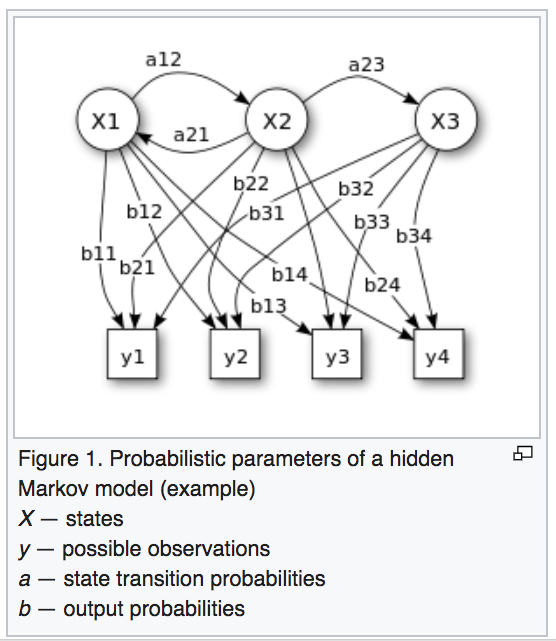

Why Hidden, Markov Model?
The reason it is called a Hidden Markov Model is because we are constructing an inference model based on the assumptions of a Markov process. The Markov process assumption is simply that the “future is independent of the past given the present”. In other words, assuming we know our present state, we do not need any other historical information to predict the future state.
To make this point clear, let us consider the scenario below where the weather, the hidden variable, can be hot, mild or cold and the observed variables are the type of clothing worn. The arrows represent transitions from a hidden state to another hidden state or from a hidden state to an observed variable.
Notice that, true to the Markov assumption, each state only depends on the previous state and not on any other prior states.

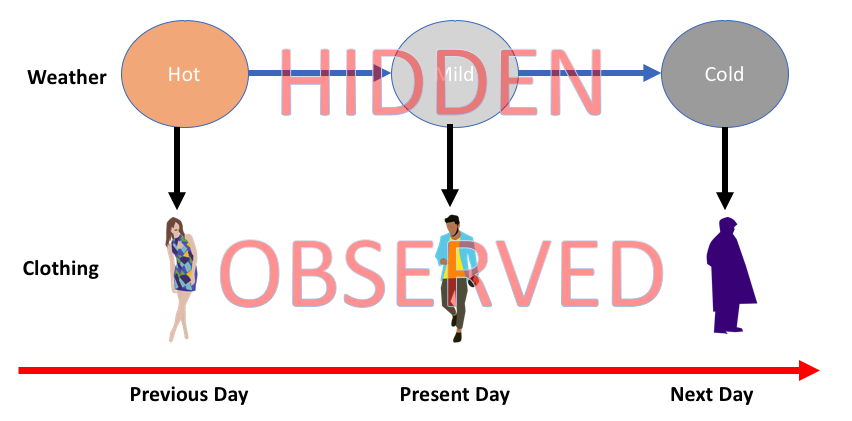

Intuition behind HMMs
HMMs are probabilistic models. They allow us to compute the joint probability of a set of hidden states given a set of observed states. The hidden states are also referred to as latent states. Once we know the joint probability of a sequence of hidden states, we determine the best possible sequence i.e. the sequence with the highest probability and choose that sequence as the best sequence of hidden states.
The ratio of hidden states to observed states is not necessarily 1 is to 1 as is evidenced by Figure 1 above. The key idea is that one or more observations allow us to make an inference about a sequence of hidden states.
In order to compute the joint probability of a sequence of hidden states, we need to assemble three types of information.

Transition data — the probability of transitioning to a new state conditioned on a present state.
Emission data — the probability of transitioning to an observed state conditioned on a hidden state.
Initial state information — the initial probability of transitioning to a hidden state. This can also be looked at as the prior probability.
The above information can be computed directly from our training data. For example, in the case of our weather example in Figure 2, our training data would consist of the hidden state and observations for a number of days. We could build our transition matrices of transitions, emissions and initial state probabilities directly from this training data.

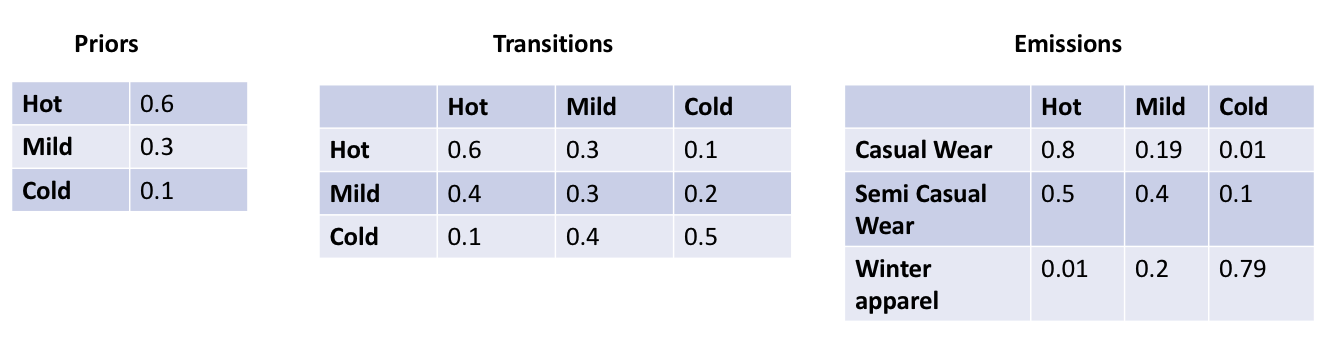

Variations of the Hidden Markov Model — HMM EM
The probability distributions of hidden states is not always known. In this case, we use Expectation Maximization (EM) models in order to determine hidden state distributions. A popular algorithm is the Baum-Welch algorithm

Primer on Dynamic Programming and Summation Rules
Dynamic Programming
As seen in the above sections on HMM, the computations become intractable as the sequence length and possible values of hidden states become large. It has been found that the problem of scoring an HMM sequence can be solved efficiently using dynamic programming, which is nothing but cached recursion.
Shown below is an image of the recursive computation of a fibonnaci series

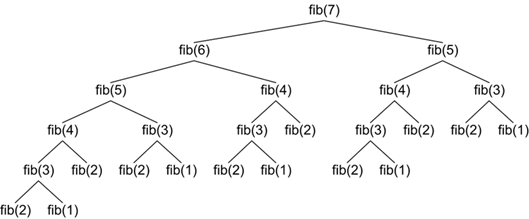

One of the things that becomes obvious when looking at this picture is that several results (fib(x) values) are reused in the computation. By caching these results, we can greatly speed up our operations

In [1]:
import time
# non-cached recursion
def fib(x):
    
    if x == 0:
        return 0
    elif x == 1:
        return 1
    else:
        return fib(x-1) + fib(x-2)
    
startTime = time.time()
print("%-14s:%d" % ("Result",fib(32)))
print("%-14s:%.4f seconds" % ("Elapsed time",time.time() - startTime))

Result        :2178309
Elapsed time  :1.1687 seconds


Fibonacci Computation with Dynamic Programming

In [2]:
fib_cache = {}
def fib(x):
    
    if fib_cache.get(x) != None:
        return fib_cache[x]
    
    result = None
    if x == 0:
        result = 0
    elif x == 1:
        result = 1
    else:
        result = fib(x-1) + fib(x-2)
        
    if fib_cache.get(x) == None:
        fib_cache[x] = result
        
    return result
    
startTime = time.time()
print("%-14s:%d" % ("Result",fib(32)))
print("%-14s:%.4f seconds" % ("Elapsed time",time.time() - startTime))

Result        :2178309
Elapsed time  :0.0000 seconds


Notice the significant improvement in performance when we move to dynamic programming or cached recursion. We use this same idea when trying to score HMM sequences as well using an algorithm called the Forward-Backward algorithm which we will talk about later

Manipulating Summations
Here we look at an idea that will be leveraged in the forward backward algorithm. This is idea that double summations of terms can be rearrangeed as a product of each of the individual summation.

The code below demonstrates this equivalency relationship

In [4]:
# double summations
x = [1,2,3]
y = [10,20,30]
total = 0
for i in x:
    for j in y:
        
        total = total + i*j
        
print (total)

360


In [5]:
total

360

In [6]:
# product of individual summations
total = 0
total1 = 0
for i in x:
    total1 = total1 + i
    
total2 = 0
for j in y:
    total2 = total2 + j
    
total = total1*total2
print( total)

360


Manipulating Maxes
Similar to manipulating double summations, the max of a double maxation can be viewed as the product of each of the individual maxations.

HMM — Manipulation Maxes

In [10]:
# double maxation
x = [1,2,3]
y = [10,20,30]
# form 1
form1 = []
for i in x:
    for j in y:
        
        form1.append(i*j)
        
print ("form1:",form1)
print ( "max(form1):",max(form1))
form1: [10, 20, 30, 20, 40, 60, 30, 60, 90]
max(form1): 90
# product of individual maxations
form2_1 = []
form2_2 = []
for i in x:
    form2_1.append(i)
for j in y:
    form2_2.append(j)
    
print ("\nform2_1",form2_1)
print( "form2_2",form2_2)
print( "max(form2_1) * max(form2_2)", max(form2_1) * max(form2_2))
form2_1 [1, 2, 3]
form2_2 [10, 20, 30]
max(form2_1) * max(form2_2) 90

SyntaxError: invalid syntax (<ipython-input-10-eacb19619544>, line 28)

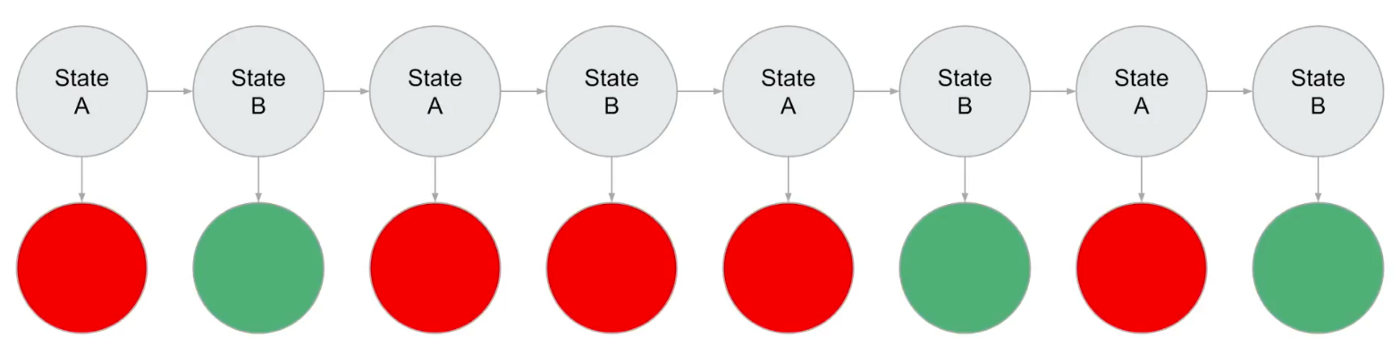

State transition and emission probabilities

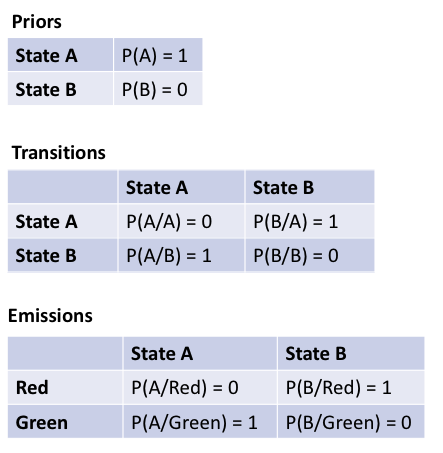

Scoring a known sequence given observed text
In this example, we score a known sequence given some text
Let us consider the below sequence

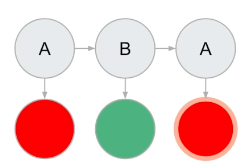

Generate list of unknown sequences

In [11]:
# given states - what are the possible combinations
# total number of combinations is (number of possible states)^(sequence length)
def generate_sequence(states,sequence_length):
    
    all_sequences = []
    nodes = []
    
    depth = sequence_length
    
    def gen_seq_recur(states,nodes,depth):
        if depth == 0:
            #print nodes
            all_sequences.append(nodes)
        else:
            for state in states:
                temp_nodes = list(nodes)
                temp_nodes.append(state)
                gen_seq_recur(states,temp_nodes,depth-1)
    
    gen_seq_recur(states,[],depth)
                
    return all_sequences

Score all possible sequences

In [13]:
def score_sequences(sequences,initial_probs,transition_probs,emission_probs,obs):
    
    best_score = -1
    best_sequence = None
    
    sequence_scores = []
    for seq in sequences:
        total_score = 1
        total_score_breakdown = []
        first = True
        for i in range(len(seq)):
            state_score = 1
            # compute transitition probability score
            if first == True:
                state_score *= initial_probs[seq[i]]
                # reset first flag
                first = False
            else:  
                state_score *= transition_probs[seq[i] + "|" + seq[i-1]]
            # add to emission probability score
            state_score *= emission_probs[obs[i] + "|" + seq[i]]
            # update the total score
            #print state_score
            total_score_breakdown.append(state_score)
            total_score *= state_score
            
        sequence_scores.append(total_score)
        
    return sequence_scores
# pretty printing our  distributions
from sets import Set
import pandas as pd
from tabulate import tabulate
def pretty_print_probs(distribs):
    
    rows = Set()
    cols = Set()
    for val in distribs.keys():
        temp = val.split("|")
        rows.add(temp[0])
        cols.add(temp[1])
        
    rows = list(rows)
    cols = list(cols)
    df = []
    for i in range(len(rows)):
        temp = []
        for j in range(len(cols)):
            temp.append(distribs[rows[i]+"|"+cols[j]])
            
        df.append(temp)
        
    I = pd.Index(rows, name="rows")
    C = pd.Index(cols, name="cols")
    df = pd.DataFrame(data=df,index=I, columns=C)
    
    print tabulate(df, headers='keys', tablefmt='psql')
def initializeSequences(_obs):
    # Generate list of sequences
    
    seqLen = len(_obs)
    seqs = generate_sequence(states,seqLen)
    # Score sequences
    seq_scores = score_sequences(seqs,initial_probs,transition_probs,emission_probs,obs)
    
    return (seqLen,seqs,seq_scores)

SyntaxError: invalid syntax (<ipython-input-13-991605781fdf>, line 57)

Compute the best sequence (Viterbi)
Note that selecting the best scoring sequence is also known as the Viterbi score. The alternative approach is the Minimum Bayes Risk approach which selects the highest scoring position across all sequence scores.